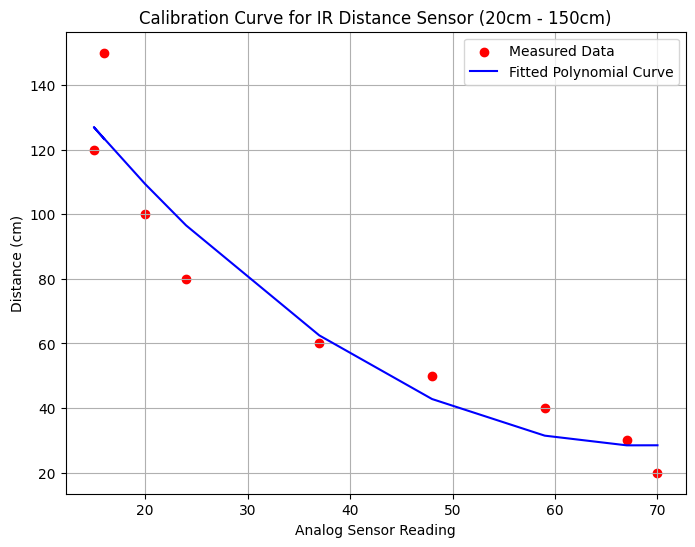

Polynomial Coefficients (a, b, c): [ 3.45349178e-02 -4.72601629e+00  1.90092586e+02]
Predicted distance for analog reading 40: 56.31 cm


In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Example data: Replace these with your actual measured values
# Known distances (cm) for calibration (measured manually)
distances = np.array([20, 30, 40, 50, 60, 80, 100, 120, 150])

# Corresponding analog sensor values (replace these with actual readings)
analog_readings = np.array([70, 67, 59, 48, 37, 24, 20, 15, 16])

# Fit a 2nd degree polynomial to the data
# polyfit returns the coefficients for the polynomial equation: ax^2 + bx + c
coefficients = np.polyfit(analog_readings, distances, 2)

# Generate fitted distances using the polynomial model
fitted_distances = np.polyval(coefficients, analog_readings)

# Plot the calibration data and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(analog_readings, distances, color='red', label='Measured Data')
plt.plot(analog_readings, fitted_distances, label='Fitted Polynomial Curve', color='blue')

# Label the axes and add a title
plt.xlabel('Analog Sensor Reading')
plt.ylabel('Distance (cm)')
plt.title('Calibration Curve for IR Distance Sensor (20cm - 150cm)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

# Display the polynomial coefficients
print(f"Polynomial Coefficients (a, b, c): {coefficients}")

# Test the calibration function by predicting a distance for a given analog reading
test_analog_value = 40  # Replace with a test value within the calibration range
predicted_distance = np.polyval(coefficients, test_analog_value)
print(f"Predicted distance for analog reading {test_analog_value}: {predicted_distance:.2f} cm")


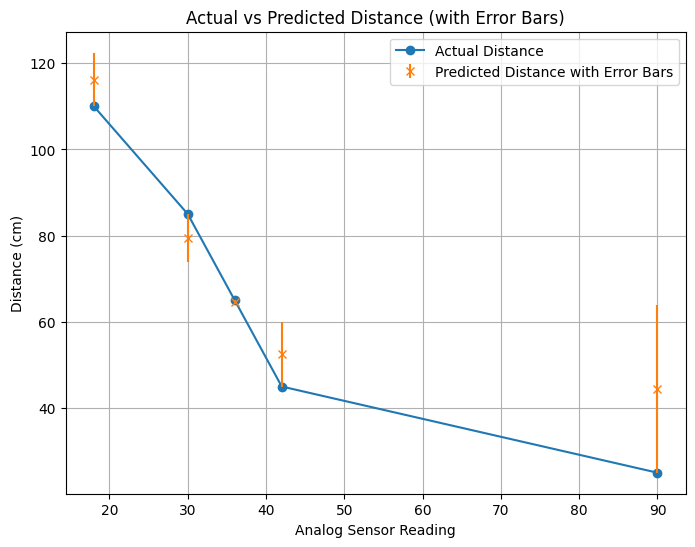

Test 1: Analog Reading = 90, Actual Distance = 25 cm, Predicted Distance = 44.48 cm, Error = -19.48 cm
Test 2: Analog Reading = 42, Actual Distance = 45 cm, Predicted Distance = 52.52 cm, Error = -7.52 cm
Test 3: Analog Reading = 36, Actual Distance = 65 cm, Predicted Distance = 64.71 cm, Error = 0.29 cm
Test 4: Analog Reading = 30, Actual Distance = 85 cm, Predicted Distance = 79.39 cm, Error = 5.61 cm
Test 5: Analog Reading = 18, Actual Distance = 110 cm, Predicted Distance = 116.21 cm, Error = -6.21 cm


In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Polynomial coefficients from the calibration (2nd-degree)
a = 3.45349178e-02
b = -4.72601629e+00
c = 1.90092586e+02

# Calibration function (polynomial)
def predict_distance(analog_reading):
    return a * analog_reading**2 + b * analog_reading + c

# Actual distances (measured manually, but not used for calibration)
actual_distances = np.array([25, 45, 65, 85, 110])  # Example distances

# Corresponding analog sensor readings for the actual distances
analog_readings_test = np.array([90, 42, 36, 30, 18])  # Replace with your actual test readings

# Predict distances using the calibration function
predicted_distances = predict_distance(analog_readings_test)

# Error: Difference between actual and predicted distances
error = actual_distances - predicted_distances

# Plot the real distances and predicted distances
plt.figure(figsize=(8, 6))

# Plot the actual distances
plt.plot(analog_readings_test, actual_distances, marker='o', label='Actual Distance')

# Plot the predicted distances with error bars
plt.errorbar(analog_readings_test, predicted_distances, yerr=np.abs(error), fmt='x', label='Predicted Distance with Error Bars')

# Label the axes and add a title
plt.xlabel('Analog Sensor Reading')
plt.ylabel('Distance (cm)')
plt.title('Actual vs Predicted Distance (with Error Bars)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

# Output predicted distances and errors for inspection
for i, (analog_reading, actual, predicted, err) in enumerate(zip(analog_readings_test, actual_distances, predicted_distances, error)):
    print(f"Test {i + 1}: Analog Reading = {analog_reading}, Actual Distance = {actual} cm, Predicted Distance = {predicted:.2f} cm, Error = {err:.2f} cm")
